In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task 5: Solve the segmentation problem for the image**

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

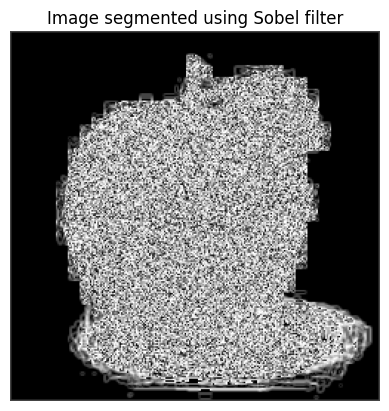

In [15]:
img = cv2.imread("/content/drive/MyDrive/DIP lab final rework/DIP_Lab_task_05.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_y_kernel = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

def convolve(image, kernel):
  image_height, image_width = image.shape
  kernel_height, kernel_width = kernel.shape

  padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2),
                                (kernel_width // 2, kernel_width // 2)),
                       mode='constant')

  convolved_image = np.zeros_like(image)

  for x in range(image_width):
    for y in range(image_height):
      region = padded_image[x:x+kernel_width, y:y+kernel_height]
      product = region * kernel
      convolved_image[x, y] = np.sum(product)

  return convolved_image

sobel_x = convolve(img_gray, sobel_x_kernel)
sobel_y = convolve(img_gray, sobel_y_kernel)

sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_clipped = np.clip(sobel_magnitude, 0, 255)
sobel_final = np.uint8(sobel_clipped)

plt.imshow(sobel_final, cmap='gray')
plt.axis('off')
plt.title('Image segmented using Sobel filter')
plt.show()